# Some Important Notes On Clustering

By Ruhi Ghosh [D18034] and Vinisha [D18042]

### Performed simulated experiments to validate concepts of Clustering

In [6]:
# importing required packages
from scipy.cluster.hierarchy import dendrogram, linkage
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

### Question 1

In [3]:
# Loading data
q1=pd.read_csv('Q1.csv')

In [4]:
q1.head()

,avg_glucose_level,bmi,Gender,State,Unnamed: 4
0,107.7,18.9,F,UP,0
1,108.8,19.1,F,UP,1
2,130.3,24.2,F,Jharkhand,2
3,131.1,25.8,F,Jharkhand,3
4,150.4,22.5,F,Karnataka,4


In [5]:
# Dropping categorical variables
q11=q1.drop(['Gender','State'],axis=1)

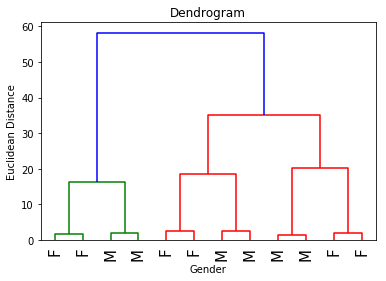

In [11]:
# Plotting dendoram with complete linkage
z=linkage(q11, 'complete')
dendrogram(z,leaf_rotation=90, leaf_font_size=15.,labels=q1['Gender'].tolist())
plt.title('Dendrogram')
plt.xlabel('Gender')
plt.ylabel('Euclidean Distance')
plt.show()

## Question 2

There are different types of distance metrics used in clustering as per business requirements. Let say, we need to do customer profiling based on there purchase behaviour of certain products, here the best metric to cluster them is correlation metric. Instead, if the business problem is to cluster customer based on quantity they are buying, then we need to cluster them based on euclidean metric.

In [12]:
# Loading data
q21=pd.read_csv('q2c.csv')

In [13]:
# Dropping Categorical Variable
q211=q21.drop(['Customer','Label'],axis=1)

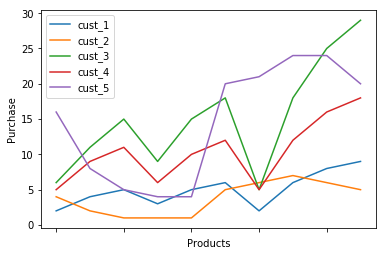

In [16]:
df = q211.T #T for transpose
df.columns=['cust_1','cust_2','cust_3','cust_4','cust_5']
df.plot(kind='line')
plt.legend(loc='upper left')
plt.xlabel("Products")
plt.ylabel("Purchase")
plt.show()

#### Using Correlation Distance

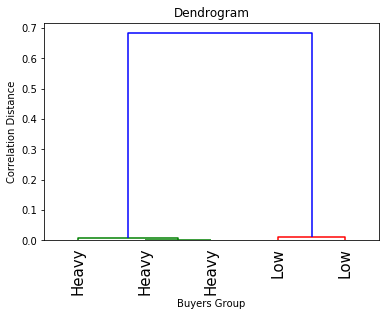

In [18]:
# Plotting dendogram using correlation distance metric for complete linkage
z=linkage(q211, 'complete',metric='correlation')
dendrogram(z,leaf_rotation=90, leaf_font_size=15.,labels=q21['Label'].tolist())
plt.title('Dendrogram')
plt.xlabel('Buyers Group')
plt.ylabel('Correlation Distance')
plt.show()

#### Useing Euclidean Distance

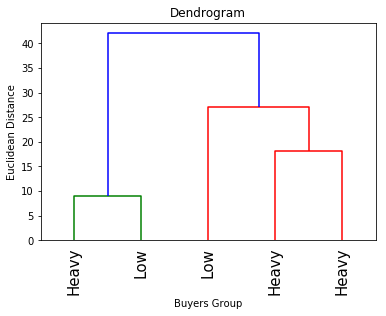

In [20]:
# Plotting dendogram with euclidean metric for complete linkage
z=linkage(q211, 'complete',metric='euclidean')
dendrogram(z,leaf_rotation=90, leaf_font_size=15.,labels=q21['Label'].tolist())
plt.title('Dendrogram')
plt.xlabel('Buyers Group')
plt.ylabel('Euclidean Distance')
plt.show()

## Question 3

Experimenting on USArrest dataset to check the significance of scaling in hierarchal clustering.

In [21]:
# Loading data
usdata = pd.read_csv("USArrest.csv")

In [22]:
# Checking the shape of the data
usdata.shape

(50, 5)

### HC Without scaling the data

In [24]:
# Dropping categorical variable
usdata1=usdata.iloc[:,1:5]

In [25]:
usdata1.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


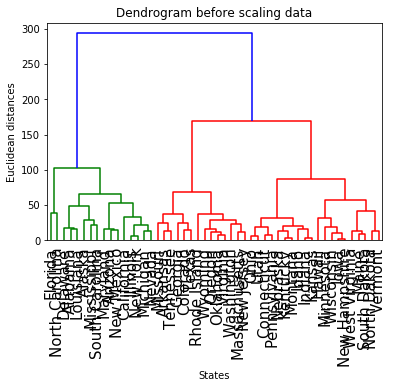

In [28]:
# Plotting Dendogram
Z = linkage(usdata1,'complete',metric="euclidean")
dendrogram(Z,leaf_rotation=90,leaf_font_size=15,labels = usdata.States.tolist())
plt.title("Dendrogram before scaling data")
plt.xlabel("States")
plt.ylabel("Euclidean distances")
plt.show()

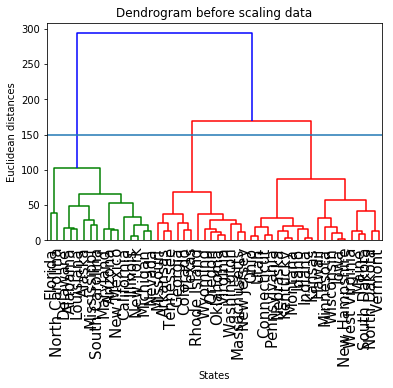

In [29]:
# Cutting Dendogram and obtaining 3 cluster solution
dendrogram(Z,leaf_rotation=90,leaf_font_size=15,labels = usdata.States.tolist())
plt.title("Dendrogram before scaling data")
plt.xlabel("States")
plt.ylabel("Euclidean distances")
plt.axhline(y=150)
plt.show()


In [30]:
# Hierarchical Cluster
hclust = AgglomerativeClustering(n_clusters = 3,affinity = 'euclidean',linkage="complete")

In [31]:
# Fitting the model
hclust.fit(usdata1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='complete', memory=None,
            n_clusters=3,
            pooling_func=<function mean at 0x0000016C6F71B598>)

In [32]:
usdata['Groups'] = hclust.labels_

In [ ]:
# Saving the data in csv
usdata.to_csv("BeforeScalingUSdata.csv")

### HC with scaling data

In [33]:
usdata_scaled = usdata1.apply(lambda x: (x-np.mean(x))/np.std(x))

In [34]:
usdata_scaled.head()

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


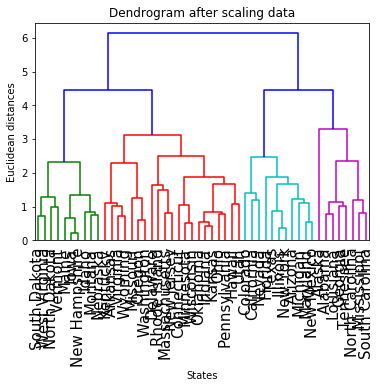

In [36]:
Z = linkage(usdata_scaled,'complete',metric="euclidean")
dendrogram(Z,leaf_rotation=90,leaf_font_size=15,labels = usdata.States.tolist())
plt.title("Dendrogram after scaling data")
plt.xlabel("States")
plt.ylabel("Euclidean distances")

plt.show()

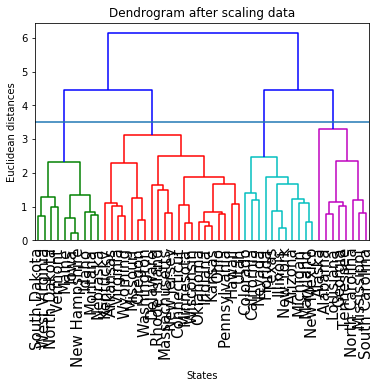

In [37]:
dendrogram(Z,leaf_rotation=90,leaf_font_size=15,labels = usdata.States.tolist())
plt.title("Dendrogram after scaling data")
plt.xlabel("States")
plt.ylabel("Euclidean distances")
plt.axhline(y=3.5)
plt.show()

In [38]:
# Hierarchical Clustering
hclust = AgglomerativeClustering(n_clusters = 4,affinity = 'euclidean',linkage="complete")

In [39]:
# Fitting model
hclust.fit(usdata_scaled)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='complete', memory=None,
            n_clusters=4,
            pooling_func=<function mean at 0x0000016C6F71B598>)

In [40]:
usdata['Groups'] = hclust.labels_

In [ ]:
# Saving the data in csv
usdata.to_csv("AfterScalingUSdataNEW.csv")

## Question 4

Experimenting on NCI60 data to check the advantage of complete and average linkage over single linkage in clustering.

In [42]:
# Loading the data
ncdata = pd.read_csv("NCI60.csv")

In [43]:
# Checking the shape of the data
ncdata.shape

(64, 6831)

In [44]:
ncdata.head()

,Cancer,1,2,3,4,5,6,7,8,9,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
0,CNS,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,...,-0.990019,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
1,CNS,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
2,CNS,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
3,RENAL,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.390000e-17,0.170000,0.245000,0.020000,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350020,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
4,BREAST,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000


In [45]:
# Dropping categorical variable
ncdata1=ncdata.iloc[:,1:6831]

In [46]:
ncdata1.head()

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
0,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654981,...,-0.990019,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
1,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285020,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
2,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
3,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.390000e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350020,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
4,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000


In [47]:
# Scaling data
ncdata_scaled = ncdata1.apply(lambda x: (x-np.mean(x))/np.std(x))

In [48]:
ncdata_scaled.head()

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
0,0.728671,1.607220,1.325688,1.355688,-0.604845,-0.220654,0.898137,-0.868741,-1.058612,-1.059174,...,-1.030663,-0.358518,-0.238245,-0.392487,0.831370,-0.200286,-0.075668,0.520893,-0.836365,-1.384675
1,1.596418,1.753544,0.441686,0.654119,0.911898,1.648748,1.849697,2.226625,-0.095860,-0.477977,...,-0.215657,-0.625720,-0.489938,-0.800791,0.013818,-1.105413,-1.117676,-0.823652,-0.925425,-1.431446
2,2.190290,-0.016217,-0.349092,0.266465,-1.311310,-0.019322,0.191185,1.988627,1.007979,0.716019,...,0.452274,-0.251651,-0.930304,-0.868790,-0.583517,-0.331142,-0.075668,0.008704,-0.960951,-0.095838
3,0.682995,-0.375502,1.628079,-0.444299,1.244434,-0.019322,0.408709,0.798057,0.045135,0.119051,...,-1.313667,-0.456479,-0.409013,-0.086293,-0.709285,-0.494711,-1.034286,1.558075,-0.693981,-0.830408
4,1.151170,-0.581759,0.965145,1.138767,0.361351,-0.033703,0.177590,0.396239,0.550041,2.310550,...,0.718297,-1.048700,-0.728079,-0.556925,0.839231,0.492157,-0.075668,1.116312,0.525182,0.000992


In [67]:
### Ploting dendogram for Complete Linkage

In [50]:
Zcomp = linkage(ncdata_scaled,'complete',metric="euclidean")

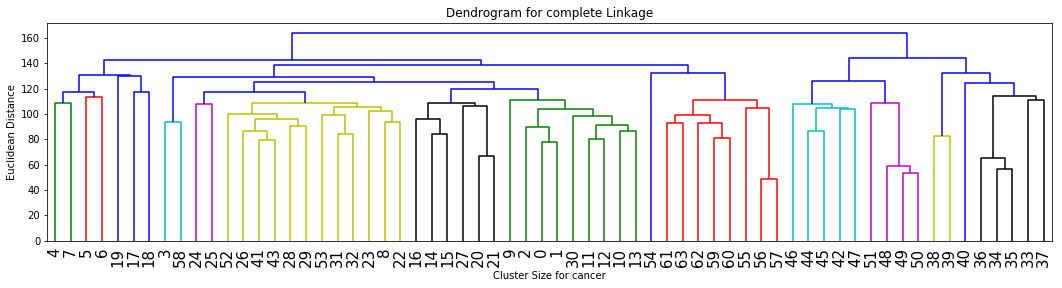

In [51]:
plt.figure(figsize=(18, 4))
dendrogram(Zcomp,leaf_rotation=90,leaf_font_size=15)
plt.title("Dendrogram for complete Linkage")
plt.xlabel("Cluster Size for cancer")
plt.ylabel("Euclidean Distance")

plt.show()

In [ ]:
### For Single Linkage

In [52]:
Zsing = linkage(ncdata_scaled,'single',metric="euclidean")

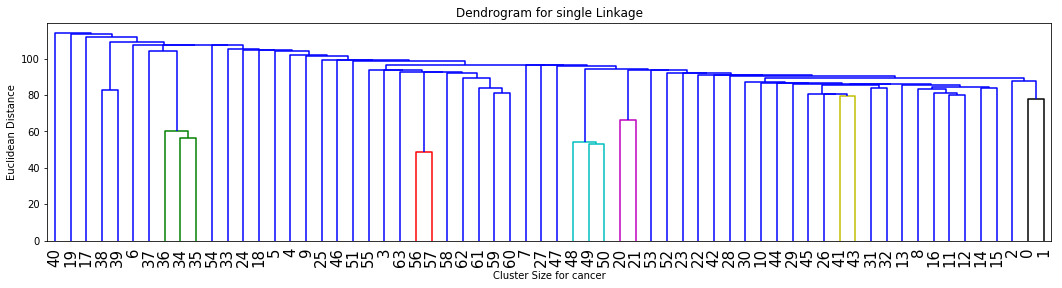

In [53]:
plt.figure(figsize=(18, 4))
dendrogram(Zsing,leaf_rotation=90,leaf_font_size=15)
plt.title("Dendrogram for single Linkage")
plt.xlabel("Cluster Size for cancer")
plt.ylabel("Euclidean Distance")

plt.show()

In [ ]:
## Average Linkage

In [54]:
Zave = linkage(ncdata_scaled,'average',metric="euclidean")

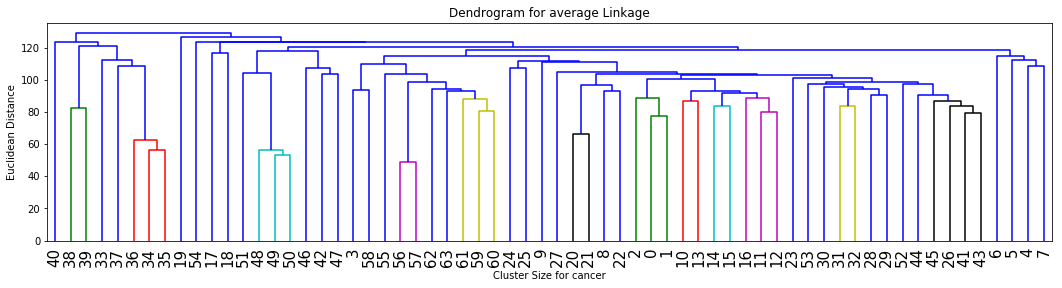

In [55]:
plt.figure(figsize=(18, 4))
dendrogram(Zave,leaf_rotation=90,leaf_font_size=15)
plt.title("Dendrogram for average Linkage")
plt.xlabel("Cluster Size for cancer")
plt.ylabel("Euclidean Distance")

plt.show()

## Question 5

Handling the outliers in Hierarchical Clustering and K-Means Clustering

In [68]:
# Loading data
q5=pd.read_csv('q5.csv')

In [69]:
q5.head()

,a,b,c
0,1,8,10
1,2,16,20
2,3,24,30
3,4,32,40
4,5,40,50


#### Hierarchical Clustering

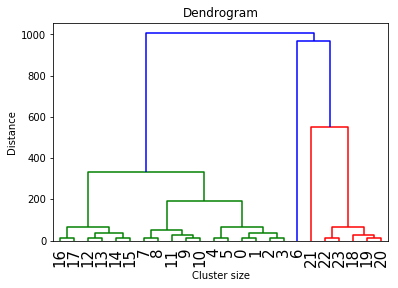

In [58]:
z=linkage(q5, 'complete',metric='euclidean')

dendrogram(z,leaf_rotation=90, leaf_font_size=15.)
plt.title('Dendrogram')
plt.xlabel('Cluster size')
plt.ylabel('Distance')
plt.show()


In [88]:
# fitting hierarchical model
hclust = AgglomerativeClustering(n_clusters=3,affinity='euclidean', linkage='complete')
hclust.fit(q5)


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='complete', memory=None,
            n_clusters=3,
            pooling_func=<function mean at 0x0000016C6F71B598>)

In [97]:
# Grouping the data
hclust.labels_
q5['Groups']=hclust.labels_
q5

,a,b,c,Groups
0,1,8,10,1
1,2,16,20,1
2,3,24,30,1
3,4,32,40,1
4,5,40,50,1
5,6,48,60,1
6,11,88,1000,2
7,12,96,120,1
8,13,104,130,1
9,14,112,140,1


#### K-Means Clustering

In [87]:
# K-Means Clustering
km=KMeans(n_clusters=3,n_init=40)
km.fit(q5)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=40, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [64]:
#cluster labels
q5['Groups']=km.labels_
q5

,a,b,c,Groups
0,1,8,10,0
1,2,16,20,0
2,3,24,30,0
3,4,32,40,0
4,5,40,50,0
5,6,48,60,0
6,11,88,1000,2
7,12,96,120,0
8,13,104,130,0
9,14,112,140,0


In [65]:
#within the Group SSE
x=km.inertia_
x

461612.8333333334

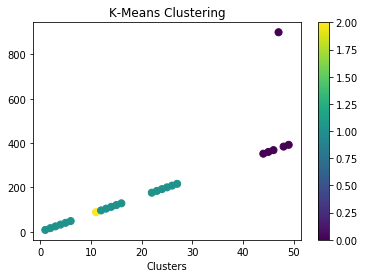

In [98]:
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(q5['a'],q5['b']
                     ,c=q5['Groups']
                     ,s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Clusters')
plt.colorbar(scatter)

## Question 6

### Advantage and Disadvantage of Hierarchical Clustering and K-Means Clustering

#### 1) Calculating the time estimation among two models with the Telco data set

In [84]:
q6=pd.read_csv("Telco.csv")

239 ms ± 13.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


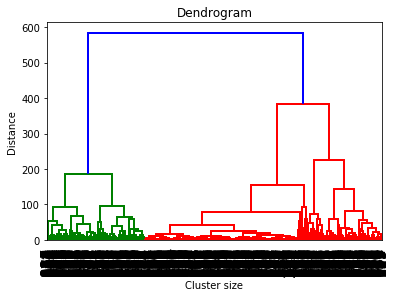

In [85]:
%%timeit
z=linkage(q6, 'complete',metric='euclidean')
dendrogram(z,leaf_rotation=90, leaf_font_size=15.)
plt.title('Dendrogram')
plt.xlabel('Cluster size')
plt.ylabel('Distance')
#plt.show()
hclust = AgglomerativeClustering(n_clusters=3,affinity='euclidean', linkage='complete')
hclust.fit(q6)

In [86]:
%%timeit
km=KMeans(n_clusters=3,n_init=40)
km.fit(q6)

162 ms ± 21.6 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### 2) Need to pre specify the number of clusters in K-Means and identifying the appropriate number of cluster from the scree plot

In [3]:
telcom = pd.read_csv("Telco.csv")

In [4]:
telcom_scaled = telcom.apply(lambda x: (x-np.mean(x))/np.std(x))

Initially Pre specifying the number of clusters i.e. 5 at random

In [92]:
km = KMeans(n_clusters=5,n_init=40)

In [93]:
## Fit the Kmeans model
km.fit(telcom_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=40, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [94]:
# Calculating within group SSE
km.inertia_

785.9308775068455

In [95]:
inertia = []
k_values = [2,3,4,5,6,7,8,9,10]

for k in k_values:
    km = KMeans(n_clusters=k,n_init=40)
    km.fit(telcom_scaled)
    inertia.append(km.inertia_)

From the scree plot we observe that at 6 the graph takes a sharp bend thus best number of cluster for this would be 6

In [8]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(telcom_scaled)
    kmeanModel.fit(telcom_scaled)
    distortions.append(sum(np.min(cdist(telcom_scaled, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / telcom_scaled.shape[0])



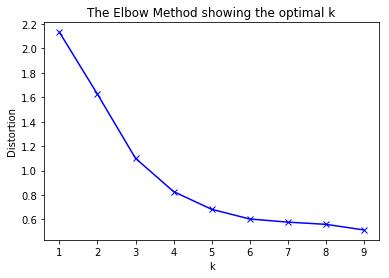

In [9]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show() 